# Importing Libraries

Link for dataset
https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/download?datasetVersionNumber=1

In [4]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
 extracting: images/validation/fear/9037.jpg  
 extracting: images/validation/fear/9040.jpg  
 extracting: images/validation/fear/9101.jpg  
 extracting: images/validation/fear/9179.jpg  
 extracting: images/validation/fear/9205.jpg  
 extracting: images/validation/fear/9232.jpg  
 extracting: images/validation/fear/9251.jpg  
 extracting: images/validation/fear/9261.jpg  
 extracting: images/validation/fear/9281.jpg  
 extracting: images/validation/fear/9302.jpg  
 extracting: images/validation/fear/9333.jpg  
 extracting: images/validation/fear/9369.jpg  
 extracting: images/validation/fear/9370.jpg  
 extracting: images/validation/fear/9474.jpg  
 extracting: images/validation/fear/949.jpg  
 extracting: images/validation/fear/9602.jpg  
 extracting: images/validation/fear/9606.jpg  
 extracting: images/validation/fear/9842.jpg  
 extracting: images/validation/fear/9898.jpg  
   creating: images/validation/happy/
 extracting: images

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D

from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [6]:
picture_size = 48
folder_path = "./images/"

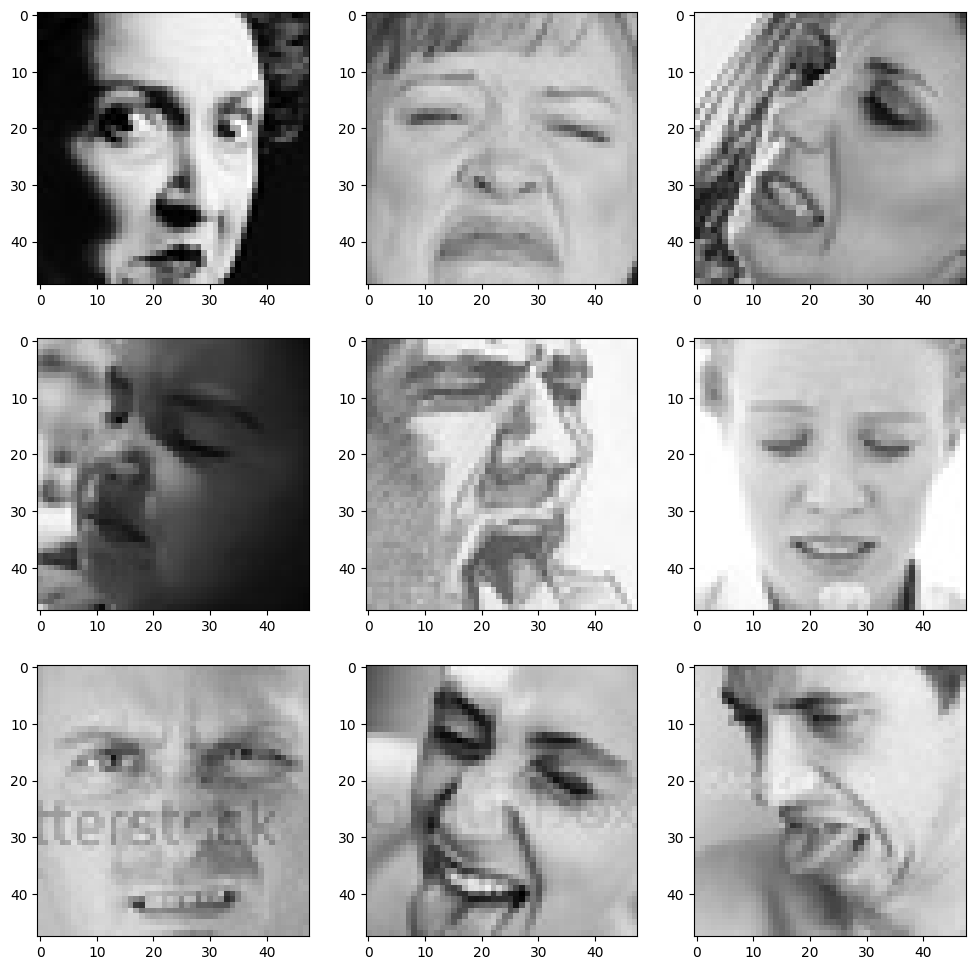

In [7]:
expression = 'disgust'


plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data

In [8]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [9]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data

In [10]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-11-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.7703 - accuracy: 0.3209

225/225 [==============================] - 31s 73ms/step - loss: 1.7703 - accuracy: 0.3209 - val_loss: 1.6057 - val_accuracy: 0.3901 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4182 - accuracy: 0.4561

225/225 [==============================] - 16s 72ms/step - loss: 1.4182 - accuracy: 0.4561 - val_loss: 1.4481 - val_accuracy: 0.4558 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2771 - accuracy: 0.5119

225/225 [==============================] - 16s 69ms/step - loss: 1.2771 - accuracy: 0.5119 - val_loss: 1.2700 - val_accuracy: 0.5256 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1814 - accuracy: 0.5482

225/225 [==============================] - 16s 73ms/step - loss: 1.1814 - accuracy: 0.5482 - val_loss: 1.2555 - val_accuracy: 0.5206 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1222 - accuracy: 0.5723

225/225 [==============================] - 16s 70ms/step - loss: 1.1222 - accuracy: 0.5723 - val_loss: 1.1672 - val_accuracy: 0.5553 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0723 - accuracy: 0.5955

225/225 [==============================] - 16s 71ms/step - loss: 1.0723 - accuracy: 0.5955 - val_loss: 1.3899 - val_accuracy: 0.4541 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.0292 - accuracy: 0.6125

225/225 [==============================] - 16s 71ms/step - loss: 1.0292 - accuracy: 0.6125 - val_loss: 1.2299 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9855 - accuracy: 0.6273Restoring model weights from the end of the best epoch: 5.



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 16s 71ms/step - loss: 0.9855 - accuracy: 0.6273 - val_loss: 1.2091 - val_accuracy: 0.5338 - lr: 0.0010
Epoch 8: early stopping


# Plotting Accuracy & Loss

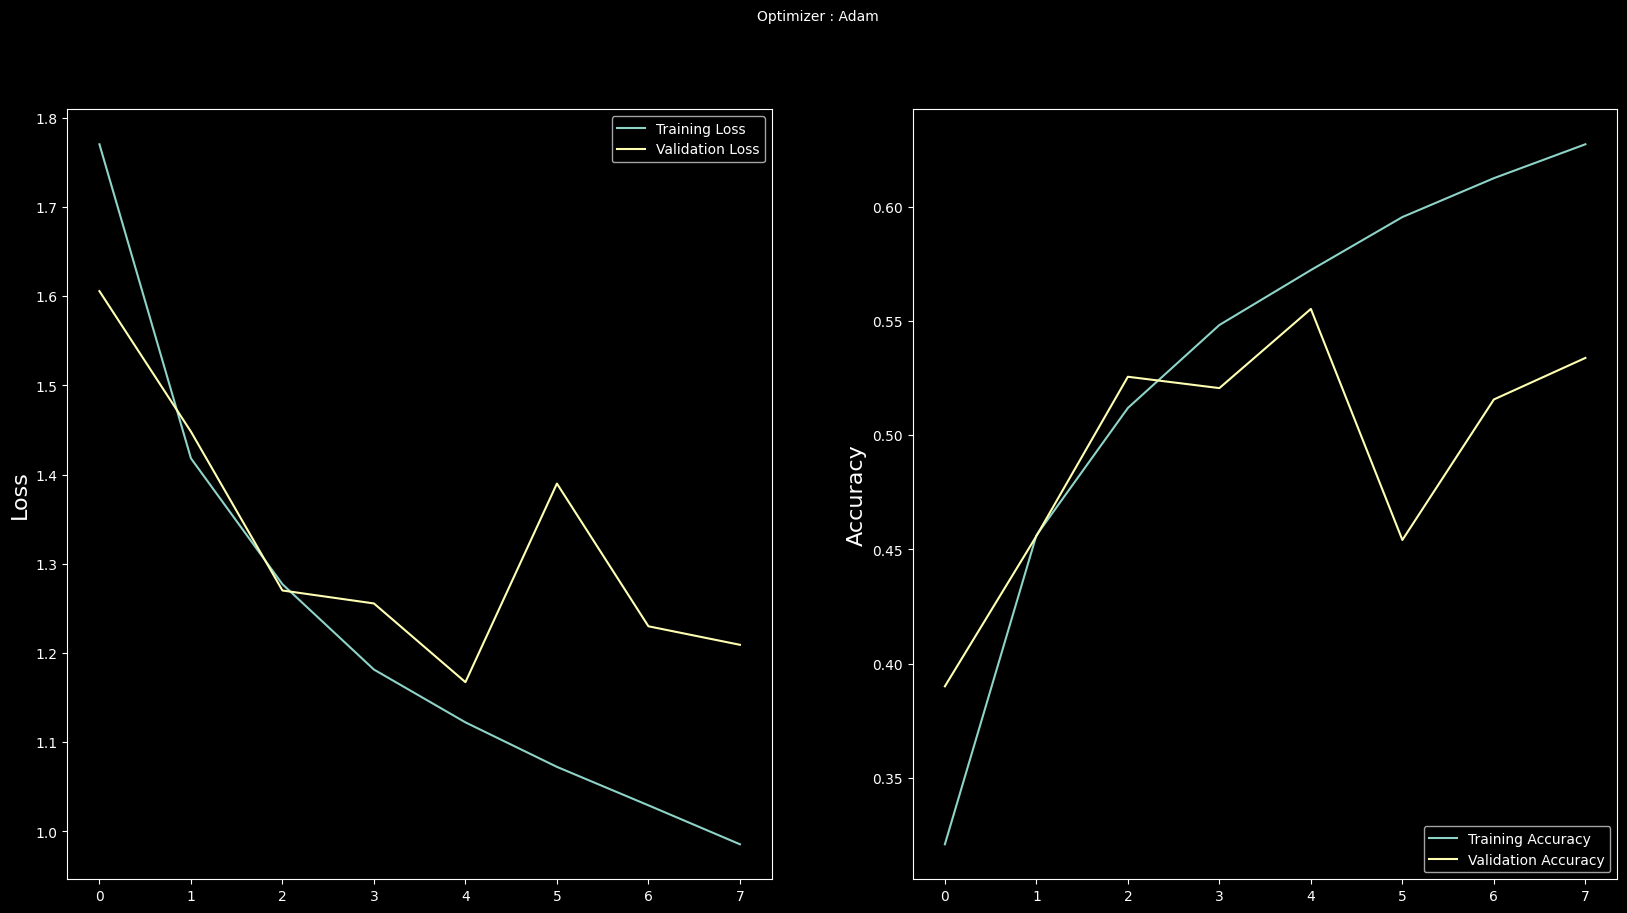

In [12]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

56/56 [==============================] - 2s 40ms/step
Normalized confusion matrix


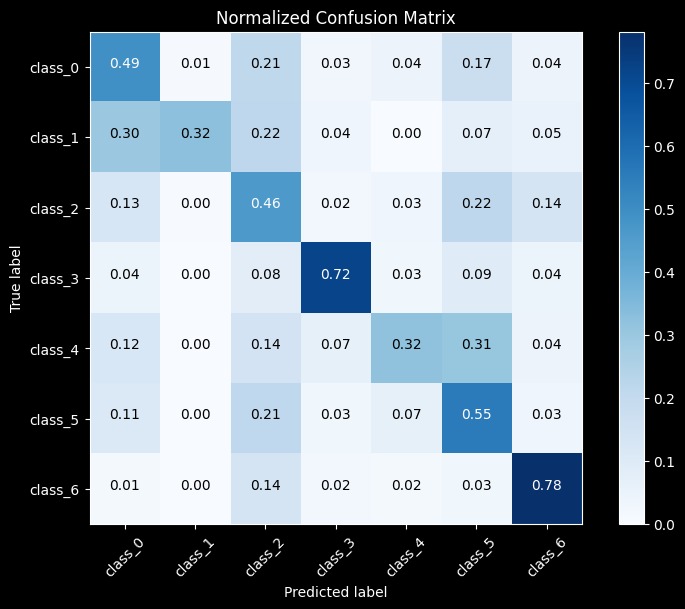

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

# Evaluate the model on the test set
predictions = model.predict(test_set)
y_pred = np.argmax(predictions, axis=1)
y_true = test_set.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Function to plot normalized confusion matrix
def plot_confusion_matrix(cm, classes, normalize=True, title='Normalized Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define class labels
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']

# Plot normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True)
plt.show()

In [14]:
# Saving the mnodel

model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
